<a href="https://colab.research.google.com/github/Geological-Survey-Ireland/Hyperspectral/blob/main/4_Removing_the_continuum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Removing the continnum**

This notebook will use data generated in notebooks [1](https://github.com/Geological-Survey-Ireland/Hyperspectral/blob/main/1_Opening_and_Starting_with_GSI_Hyperpectral_Data.ipynb), [2](https://github.com/Geological-Survey-Ireland/Hyperspectral/blob/main/2_Denoising_GSI_Hyperspectral_Data.ipynb) and [3](https://github.com/Geological-Survey-Ireland/Hyperspectral/blob/main/3_Removing_the_core_box_from_the_image.ipynb).

The continuum or [convex hull](https://en.wikipedia.org/wiki/Convex_hull) of a spectra is the smallest convex set that contains it.

The continuum is removed by dividing the data by its convex hull, the result is also known as the convex hull quotient.

The resulting data is always between 0 and 1, making it extremely useful for comparing absorption feature wavelength positions regardless of scale.

To start we will import all the modules we will need, as in previous notebooks.


In [1]:
!pip install spectral

import spectral as sp
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.dpi'] = 200

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 5.3 MB/s eta 0:00:00


To start we will open the core length and band files that we saved in previous notebooks.

In [2]:
# Use numpy to load the bands from the previous notebook
bands = np.load('/content/drive/MyDrive/Public/Clipped_Bands.npy')
# Use numpy to load the data from the previous notebook
length = np.load('/content/drive/MyDrive/Public/SampleData_length.npy')

We are going to plot the same pixel many times for comparison. we will plot pixel (1800, 15) as it is roughly in the centre of the dataset.

We will calculate the continuum each pixel using the spectral python library and then plot the original and the continuum for our example pixel.

To calculate the continuum, spectral python needs the bands list as an argument. The bands list should be in ascending order.

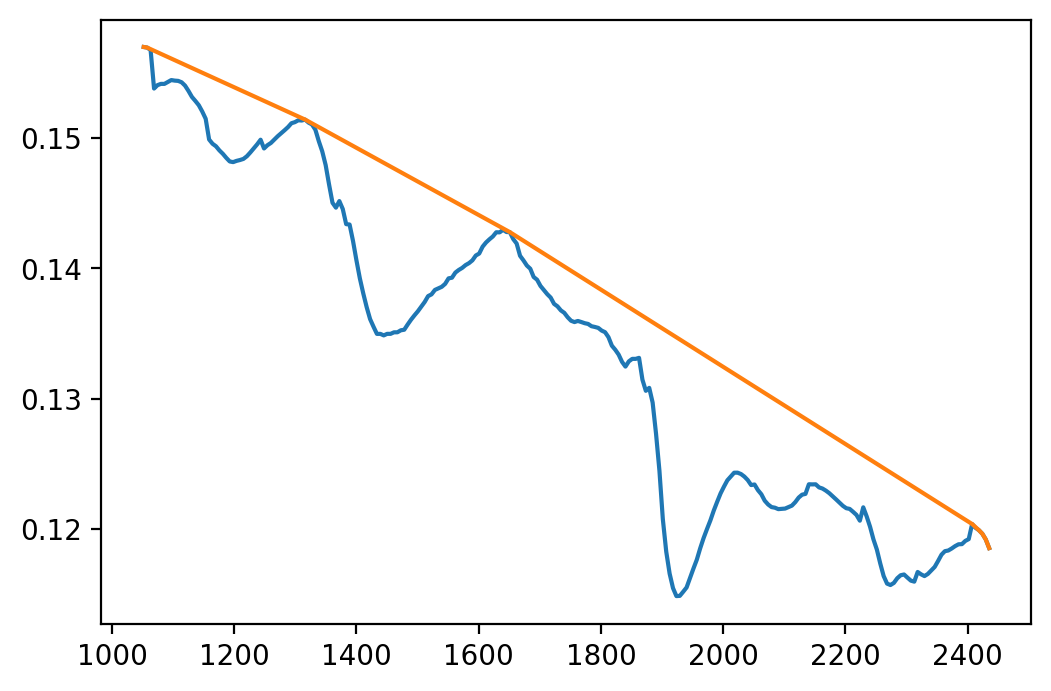

In [3]:
# Calculate the spectral continuum of each spectra
# using the spectral python library. 
length_con = sp.spectral_continuum(length, bands)
# Use matplotlib to plot our example pixel
plt.figure()
plt.plot(bands, length[1800, 15]) # original reflectance
plt.plot(bands, length_con[1800, 15]) # continuum
plt.show()

The specral_continuum call calculates the continuum using the convex method by default, but it also has a segmented mode.

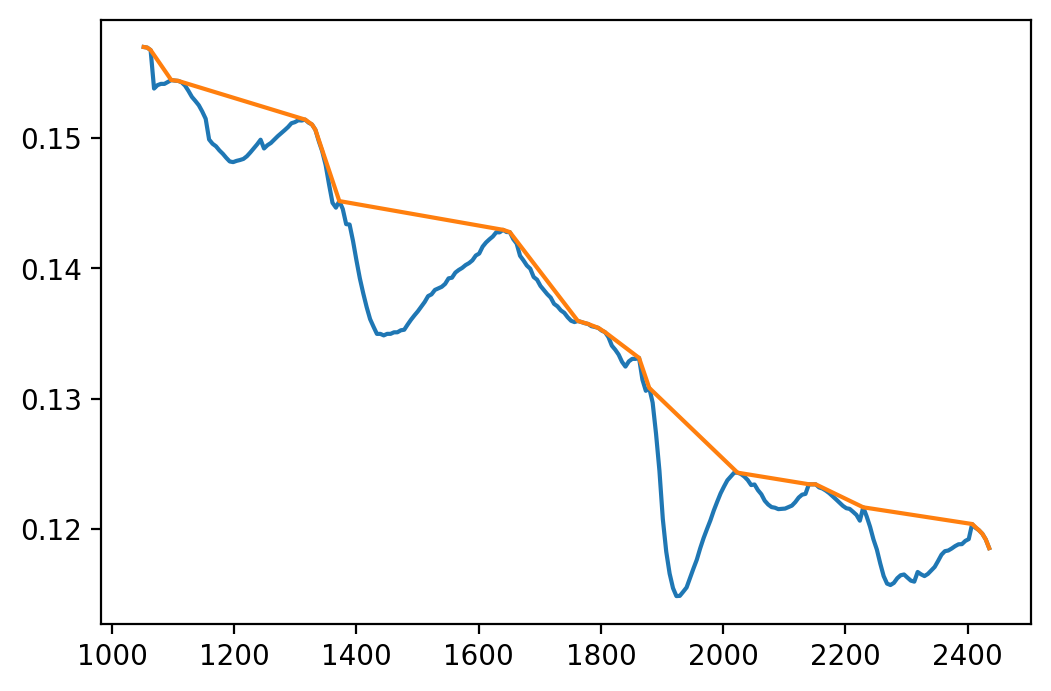

In [4]:
# Calculate the spectral continuum of each spectra
# using the spectral python library. 
length_con = sp.spectral_continuum(length, bands, mode='segmented')
# Use matplotlib to plot our example pixel
plt.figure()
plt.plot(bands, length[1800, 15]) # original refelctance
plt.plot(bands, length_con[1800, 15]) # segmented continuum
plt.show()

You can see that the two modes will produce significantly different results. Lets plot the example pixel with the continuum removed using both methods.

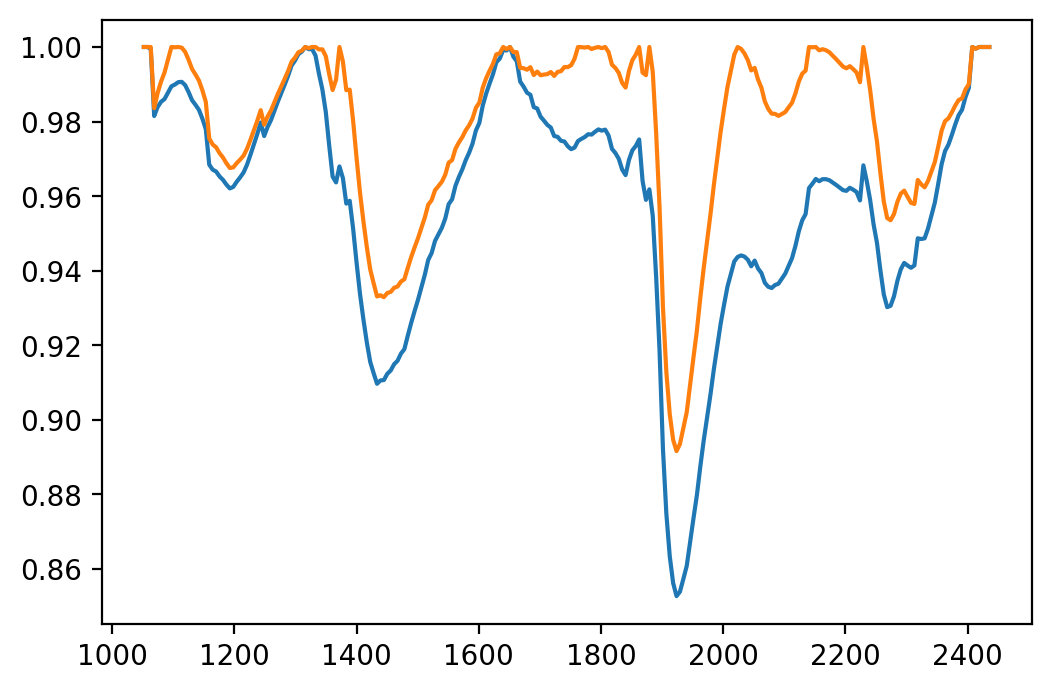

In [7]:
# Calculate the continuum removed spectra using the 
# default spectral python call.
length_cr = sp.remove_continuum(length, bands) 
# Calculate the continuum removed spectra using the 
# segmented mode.
length_cr_seg = sp.remove_continuum(length, bands, mode='segmented') 
# Use matplotlib to plot our example pixel
plt.figure()
plt.plot(bands, length_cr[1800, 15]) # default continuum removed
plt.plot(bands, length_cr_seg[1800, 15]) # segmented continuum removed
plt.show()


The two methods, unsurprisingly, produce very similar shapes, but they are different enough that they may impact on further processing that we will use.

The graph below shows that the wavelength position of the deepest point of the absorbtion feature does not change between methods, but the width and slop of the features does.

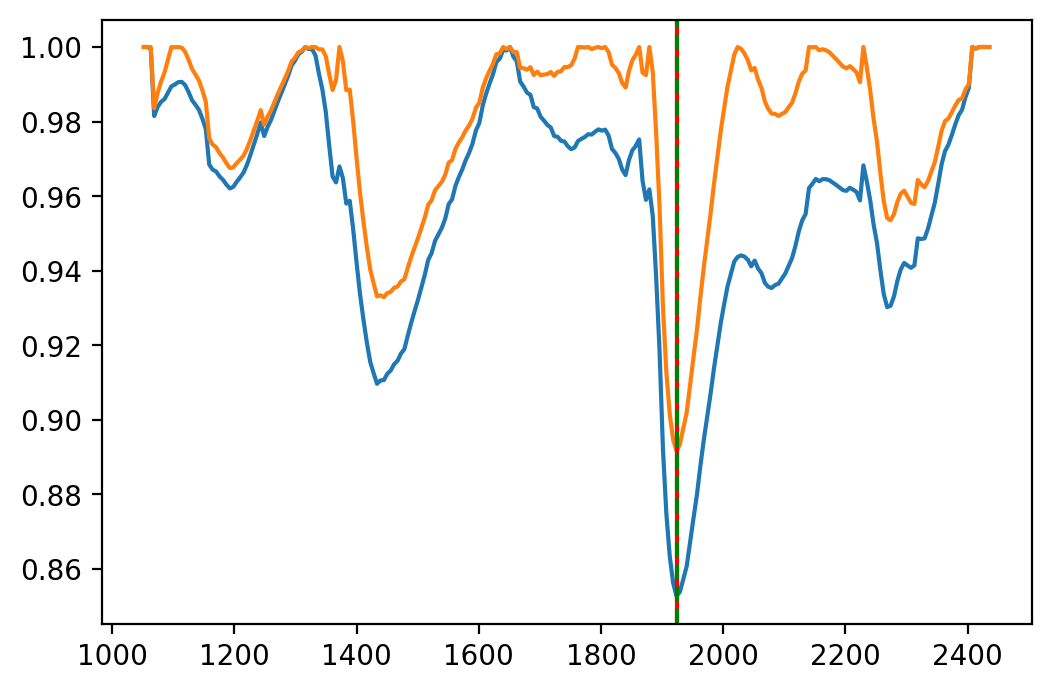

In [18]:
plt.figure()
plt.plot(bands, length_cr[1800, 15]) # default continuum removed
plt.plot(bands, length_cr_seg[1800, 15]) # segmented continuum removed
# Plot a vertical line at the wavelength position of the deepest absorbtion feature (red line)
plt.axvline(bands[np.argmin(length_cr[1800, 15])], color='r', linestyle='-') # default continuum removed 
# Plot a vertical line at the wavelength position of the deepest absorbtion feature (green dashed line)
plt.axvline(bands[np.argmin(length_cr_seg[1800, 15])], color='g', linestyle='--')# segmented continuum removed
plt.show()



In [19]:
# Save the continuum removed data for both methods for later use
np.save('/content/drive/MyDrive/Public/Sample_Data_cr.npy', length_cr)
np.save('/content/drive/MyDrive/Public/Sample_Data_cr_seg.npy', length_cr_seg)